In [ ]:
!pip install rdkit

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from sklearn.preprocessing import FunctionTransformer

In [ ]:
data = pd.read_excel('19_35000.xls')
data.head()

,Unnamed: 0,Title,IC50,SMILES
0,NaN,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,NaN,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,NaN,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,NaN,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,NaN,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [ ]:
data.columns

Index(['Unnamed: 0', 'Title', 'IC50', 'SMILES'], dtype='object')

In [ ]:
data = data[['Title','SMILES', 'IC50']]


In [ ]:
data.head()

,Title,SMILES,IC50
0,CHEMBL2206459,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,0.000015
1,CHEMBL3818159,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,0.000016
2,CHEMBL1956716,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,0.000033
3,CHEMBL1956715,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,0.000032
4,CHEMBL4444029,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,0.000041


In [ ]:
def mol_dsc_calc(mols):
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in mols)

# список конституционных и физико-химических дескрипторов из библиотеки RDKit
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA}

# sklearn трансформер для использования в конвейерном моделировании
descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X = descriptors_transformer.transform(data['SMILES'])
X.head()

[21:25:28] Conflicting single bond directions around double bond at index 55.
[21:25:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:25:28] Conflicting single bond directions around double bond at index 55.
[21:25:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:25:28] Conflicting single bond directions around double bond at index 55.
[21:25:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:25:28] Conflicting single bond directions around double bond at index 55.
[21:25:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:25:28] Conflicting single bond directions around double bond at index 55.
[21:25:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:25:28] Conflicting single bond directions around double bond at index 55.
[21:25:28]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:25:28] Conflicting single bond direc

,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
0,24,7,9,4,6,10,7,138,0,0,1,362.367,0.38187,90.4296,157.76
1,21,4,6,4,3,6,7,120,0,0,1,298.383,1.05450,79.7279,101.65
2,21,3,6,5,2,6,7,118,0,0,1,295.359,-0.36170,77.0531,104.48
3,20,3,6,5,2,6,6,114,0,0,1,283.348,-0.52780,72.5301,104.48
4,24,4,9,6,4,9,3,122,3,0,3,329.268,1.09742,81.9775,149.28


In [ ]:
data_dsc = data.join(X)

In [ ]:
data_dsc.head()

,Title,SMILES,IC50,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
0,CHEMBL2206459,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,0.000015,24,7,9,4,6,10,7,138,0,0,1,362.367,0.38187,90.4296,157.76
1,CHEMBL3818159,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,0.000016,21,4,6,4,3,6,7,120,0,0,1,298.383,1.05450,79.7279,101.65
2,CHEMBL1956716,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,0.000033,21,3,6,5,2,6,7,118,0,0,1,295.359,-0.36170,77.0531,104.48
3,CHEMBL1956715,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,0.000032,20,3,6,5,2,6,6,114,0,0,1,283.348,-0.52780,72.5301,104.48
4,CHEMBL4444029,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,0.000041,24,4,9,6,4,9,3,122,3,0,3,329.268,1.09742,81.9775,149.28


In [ ]:
data_dsc.to_excel('data_dsc.xlsx')

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors, AllChem


def rdkit_fp(smiles_column: pd.Series, radius=3, nBits=2048, useChirality=False):
    # morganFP_rdkit
    def desc_gen(mol):
        mol = Chem.MolFromSmiles(mol)
        bit_vec = np.zeros((1,), np.int16)
        DataStructs.ConvertToNumpyArray(
            AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits, useChirality=useChirality), bit_vec)
        return bit_vec

    return pd.DataFrame.from_records(smiles_column.apply(func=desc_gen), columns=[f'bit_id_{i}' for i in range(nBits)])


def rdkit_2d(smiles_column: pd.Series):
    # 2d_rdkit
    descriptors = {i[0]: i[1] for i in Descriptors._descList}
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in smiles_column)

In [ ]:
Y = rdkit_fp(data['SMILES'])
Y.head()

[21:29:25] Conflicting single bond directions around double bond at index 55.
[21:29:25]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:29:43] Conflicting single bond directions around double bond at index 7.
[21:29:43]   BondStereo set to STEREONONE and single bond directions set to NONE.


,bit_id_0,bit_id_1,bit_id_2,bit_id_3,bit_id_4,bit_id_5,bit_id_6,bit_id_7,bit_id_8,bit_id_9,...,bit_id_2038,bit_id_2039,bit_id_2040,bit_id_2041,bit_id_2042,bit_id_2043,bit_id_2044,bit_id_2045,bit_id_2046,bit_id_2047
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_fp = data.join(Y)
data_fp.head()

,Title,SMILES,IC50,bit_id_0,bit_id_1,bit_id_2,bit_id_3,bit_id_4,bit_id_5,bit_id_6,...,bit_id_2038,bit_id_2039,bit_id_2040,bit_id_2041,bit_id_2042,bit_id_2043,bit_id_2044,bit_id_2045,bit_id_2046,bit_id_2047
0,CHEMBL2206459,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,0.000015,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,CHEMBL3818159,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,0.000016,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1956716,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,0.000033,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1956715,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,0.000032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4444029,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,0.000041,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_fp.to_excel('data_fp.xlsx')

In [ ]:
Z = rdkit_2d(data['SMILES'])
Z.head()

In [ ]:
data_2d = data.join(Z)
data_2d.head()

,Title,SMILES,IC50,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL2206459,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,0.000015,11.743425,11.743425,0.061289,-4.487931,0.216971,25.916667,362.367,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3818159,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,0.000016,11.324462,11.324462,0.124444,-0.959020,0.651957,25.571429,298.383,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1956716,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,0.000033,11.521766,11.521766,0.025290,-1.252691,0.624022,25.333333,295.359,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1956715,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,0.000032,11.271766,11.271766,0.000752,-1.236230,0.681758,26.250000,283.348,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4444029,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,0.000041,11.745432,11.745432,0.243422,-1.443615,0.561612,10.708333,329.268,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_2d.to_excel('data_2d.xlsx')

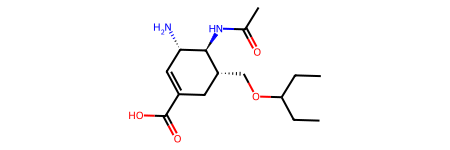

In [ ]:
# сделать рисунок молекулы

m = Chem.MolFromSmiles(data['SMILES'][1])
m

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных
# Замените 'data.csv' на путь к вашему файлу с данными
data = pd.read_excel('19_35000.xls')

# Преобразование SMILES в отпечатки пальцев
# data['mol'] = data['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
# data['fp'] = data['IC50'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))
data['mol'] = data['SMILES'].apply(lambda x: Chem.MolFromSmiles(x) if Chem.MolFromSmiles(x) is not None else None)
data = data.dropna(subset=['IC50'])  # Удаление строк с недействительными SMILES
data['fp'] = data['IC50'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data['fp'], data['ic50'], test_size=0.2, random_state=42)

# Преобразование данных в массивы numpy для обучения модели
X_train = np.array(list(X_train))
X_test = np.array(list(X_test))

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


[11:08:06] Conflicting single bond directions around double bond at index 55.
[11:08:06]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:08:06] Conflicting single bond directions around double bond at index 55.
[11:08:06]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:08:17] Conflicting single bond directions around double bond at index 7.
[11:08:17]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:08:17] Conflicting single bond directions around double bond at index 7.
[11:08:17]   BondStereo set to STEREONONE and single bond directions set to NONE.


ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(float, int)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(class RDKit::ROMol mol, unsigned int radius, unsigned int nBits=2048, class boost::python::api::object invariants=[], class boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, class boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)

In [ ]:
for smiles_formula in data['SMILES']:
    mol = Chem.MolFromSmiles(smiles_formula)
    if mol:
        img = Draw.MolToImage(mol)
        img.show()  # Отображаем изображение молекулы
    else:
        print(f"Ошибка при создании молекулы из формулы: {smiles_formula}")

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
smiles_column = 'SMILES'
i = 0
# Создаем папку для сохранения визуализаций
output_folder = '/content/drive/MyDrive/Colab/molecul'  # Замените на фактический путь

# Создаем папку, если она не существует
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for smiles_formula in data[smiles_column]:
    mol = Chem.MolFromSmiles(smiles_formula)
    if mol:
        img = Draw.MolToImage(mol)
        # Генерируем уникальное имя файла на основе формулы
        img_filename = f"molecule_{i}.png"
        img_path = os.path.join(output_folder, img_filename)
        img.save(img_path)
        print(f"Визуализация сохранена в {img_path}")
    else:
        print(f"Ошибка при создании молекулы из формулы: {smiles_formula}")
    i += 1

print(f"Все визуализации сохранены в папке: {output_folder}")

Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_0.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_1.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_2.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_3.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_4.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_5.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_6.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_7.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_8.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_9.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_10.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_11.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_12.

[22:25:02] Conflicting single bond directions around double bond at index 55.
[22:25:02]   BondStereo set to STEREONONE and single bond directions set to NONE.


Выходные данные были обрезаны до нескольких последних строк (5000).
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30833.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30834.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30835.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30836.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30837.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30838.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30839.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30840.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30841.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30842.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_30843.png
Визуализация сохранена в /content/drive/M

[22:42:26] Conflicting single bond directions around double bond at index 7.
[22:42:26]   BondStereo set to STEREONONE and single bond directions set to NONE.


Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35833.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35834.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35835.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35836.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35837.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35838.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35839.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35840.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35841.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35842.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35843.png
Визуализация сохранена в /content/drive/MyDrive/Colab/molecul/molecule_35844.png
Визуализация сохранена в /co

In [ ]:
data_directory = r"/content/drive/MyDrive/Colab/molecul"

folders = [f.name for f in os.scandir(data_directory) if f.is_dir()]

for folder in folders:
    old_path = os.path.join(data_directory, folder)
    new_folder = folder.replace('class_', '')
    new_folder = new_folder.zfill(2)
    new_path = os.path.join(data_directory, new_folder)
    os.rename(old_path, new_path)

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from torch.cuda.amp import autocast, GradScaler
import torchvision
import torchvision.models as models
from torchvision import transforms, datasets

from tqdm import tqdm

import time
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import os
from skimage import io
from PIL import Image
from torch.optim.lr_scheduler import StepLR


In [ ]:
ic50_values = data['IC50'].tolist()

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, root_folder, ic50_values, transform=None):
        self.root_folder = root_folder
        self.image_files = os.listdir(root_folder)
        self.ic50_values = ic50_values  # список значений IC50
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_folder, self.image_files[idx])
        image = io.imread(img_name)
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        ic50 = self.ic50_values[idx]  # получаем соответствующее значение IC50
        return image, ic50

# Путь к папке с изображениями молекул
root_folder = '/content/drive/MyDrive/Colab/molecul'

# Преобразования данных (если нужно)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создаем пользовательский датасет
custom_dataset = CustomImageDataset(root_folder, ic50_values, transform=transform)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet = models.resnet18(pretrained=True) # ~150

for param in resnet.parameters():
    param.requires_grad = False

num_classes = 1
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

resnet.to(device)

train_transforms = transforms.Compose([
    transforms.RandomPerspective(distortion_scale=0.09, p=0.75, interpolation=3),#, fill=255),
    transforms.Resize((224, 224)),
    transforms.ColorJitter(hue=(-0.5,0.5)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_data = custom_dataset
# train_data = datasets.ImageFolder("/content/drive/MyDrive/Colab/molecul", transform=train_transforms)
# test_data = datasets.ImageFolder("/content/drive/MyDrive/HW2.2/test_butterflies", transform=val_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=64)

criterion = nn.MSELoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)


num_epochs = 2

for epoch in range(num_epochs):
    running_loss = 0.0
    num_batches = len(train_loader)
    accumulation_steps = 4
    optimizer.zero_grad()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device).float()
        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1) % accumulation_steps == 0:  # Обновление весов каждые 4 шага
            optimizer.step()
            optimizer.zero_grad()
        if (i+1) % 10 == 0:
            avg_loss = running_loss / (i+1)
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{num_batches}], Loss: {avg_loss:.4f}')
    scheduler.step()
    avg_epoch_loss = running_loss / num_batches
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_epoch_loss:.4f}')

Epoch [1/2], Step [10/1137], Loss: 1442.3094
Epoch [1/2], Step [20/1137], Loss: 1340.0606
Epoch [1/2], Step [30/1137], Loss: 1063.8506
Epoch [1/2], Step [40/1137], Loss: 899.8728
Epoch [1/2], Step [50/1137], Loss: 778.1799
Epoch [1/2], Step [60/1137], Loss: 705.1294
Epoch [1/2], Step [70/1137], Loss: 1136.2953
Epoch [1/2], Step [80/1137], Loss: 1032.2584
Epoch [1/2], Step [90/1137], Loss: 1018.0247
Epoch [1/2], Step [100/1137], Loss: 2679.2225
Epoch [1/2], Step [110/1137], Loss: 2539.0273
Epoch [1/2], Step [120/1137], Loss: 2345.1433
Epoch [1/2], Step [130/1137], Loss: 2643.9561
Epoch [1/2], Step [140/1137], Loss: 2520.2009
Epoch [1/2], Step [150/1137], Loss: 2454.6736
Epoch [1/2], Step [160/1137], Loss: 2529.9353
Epoch [1/2], Step [170/1137], Loss: 2606.0787
Epoch [1/2], Step [180/1137], Loss: 2495.0577
Epoch [1/2], Step [190/1137], Loss: 2371.4916
Epoch [1/2], Step [200/1137], Loss: 2267.4592
Epoch [1/2], Step [210/1137], Loss: 2191.5881
Epoch [1/2], Step [220/1137], Loss: 2106.1111


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/2], Average Loss: 2354.3393
Epoch [2/2], Step [10/1137], Loss: 708.1492
Epoch [2/2], Step [20/1137], Loss: 666.6635
Epoch [2/2], Step [30/1137], Loss: 656.3756
Epoch [2/2], Step [40/1137], Loss: 501.5822
Epoch [2/2], Step [50/1137], Loss: 445.8549
Epoch [2/2], Step [60/1137], Loss: 431.0206
Epoch [2/2], Step [70/1137], Loss: 486.1586
Epoch [2/2], Step [80/1137], Loss: 535.2108
Epoch [2/2], Step [90/1137], Loss: 539.6135
Epoch [2/2], Step [100/1137], Loss: 588.9829
Epoch [2/2], Step [110/1137], Loss: 550.8264
Epoch [2/2], Step [120/1137], Loss: 594.4651
Epoch [2/2], Step [130/1137], Loss: 857.1848
Epoch [2/2], Step [140/1137], Loss: 837.0667
Epoch [2/2], Step [150/1137], Loss: 1949.5060
Epoch [2/2], Step [160/1137], Loss: 1867.0759
Epoch [2/2], Step [170/1137], Loss: 1765.7049
Epoch [2/2], Step [180/1137], Loss: 1718.9543
Epoch [2/2], Step [190/1137], Loss: 1650.6675
Epoch [2/2], Step [200/1137], Loss: 1589.8319
